In [8]:
## importing libraries 
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
## Getting three stocks from data downloaded by third party website Kaggle
infy = pd.read_csv("Data/INFY.csv")
itc = pd.read_csv("Data/ITC.csv")
lt = pd.read_csv("Data/LT.csv")

In [6]:
# Checking the data 
infy.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


In [11]:
## For understanding i can see the size of data 

itc.shape

(5306, 15)

In [13]:
# Dtype (Data Types)
infy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [16]:
# So the data is in object will convert it to datetime for making it easy to call the function but before that we
# will filter the data by eliminating data null and duplicate values and make it more understandable
itc.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

In [23]:
# So the variable who doesnt have 0, has null values we will not take them into consideration
# Now we will check the duplicates
itc.duplicated().sum()
infy.duplicated().sum()
lt.duplicated().sum()
# No duplicates

0

In [24]:
# Rounding the values
itc.describe().round(2)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5306.00,5.306000e+03,5.306000e+03,2456.00,4792.00,4792.00
mean,420.36,420.63,426.63,414.24,420.25,420.27,420.52,7.173165e+06,1.799399e+14,94563.76,4571757.62,0.59
std,328.17,328.24,333.33,323.33,328.11,328.17,328.44,9.613497e+06,2.155242e+14,59571.72,5040516.73,0.13
min,115.45,115.00,116.20,114.40,115.50,115.45,115.39,6.797000e+03,5.340132e+11,1425.00,6120.00,0.10
25%,201.65,202.00,204.50,198.50,201.50,201.65,201.70,1.038020e+06,5.423007e+13,56465.25,1614865.00,0.52
50%,280.05,280.20,283.00,277.02,279.90,280.02,280.06,5.122630e+06,1.222452e+14,80494.50,3569193.00,0.61
75%,631.88,630.98,640.00,623.50,631.15,631.36,631.73,8.788539e+06,2.315038e+14,113228.00,6023116.75,0.69
max,1940.10,1946.00,1964.80,1916.30,1940.00,1940.10,1933.79,1.494797e+08,4.254992e+15,667965.00,86293484.00,1.00


In [25]:
# now converting dtype from object to date
itc["Date"] = pd.to_datetime(itc["Date"])
lt["Date"] = pd.to_datetime(lt["Date"])
infy["Date"] = pd.to_datetime(infy["Date"])

In [33]:
# eliminating the null values
itc=itc.drop(['Trades','Deliverable Volume','%Deliverble'], axis=1)
lt=lt.drop(['Trades','Deliverable Volume','%Deliverble'], axis=1)
infy=infy.drop(['Trades','Deliverable Volume','%Deliverble'], axis=1)

KeyError: "['Trades', 'Deliverable Volume', '%Deliverble'] not found in axis"

In [35]:
infy['Month']=infy["Date"].dt.month

infy['Year']=infy["Date"].dt.year

infy['Day']=infy["Date"].dt.day

itc['Month']=itc["Date"].dt.month

itc['Year']=itc["Date"].dt.year

itc['Day']=itc["Date"].dt.day

lt['Month']=lt["Date"].dt.month

lt['Year']=lt["Date"].dt.year

lt['Day']=lt["Date"].dt.day


In [36]:
infy.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Month,Year,Day
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN,1,2000,3
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN,1,2000,4
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN,1,2000,5
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN,1,2000,6
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN,1,2000,7


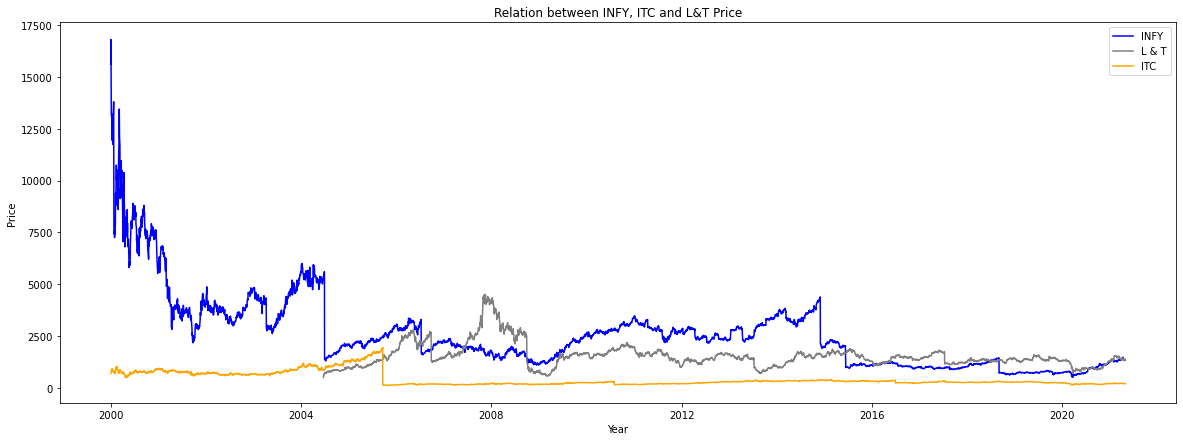

In [37]:
## Plotting Charts

plt.figure(figsize=(20,7))

plt.plot(infy['Date'],infy['Open'],color='blue',label='INFY')

plt.plot(lt['Date'],lt['Open'],color='grey',label='L & T')

plt.plot(itc['Date'],itc['Open'],color='orange',label='ITC')

## Doing price comparsion

plt.title("Relation between INFY, ITC and L&T Price")

plt.xlabel("Year")

plt.ylabel("Price")

plt.legend(title="")

plt.show()

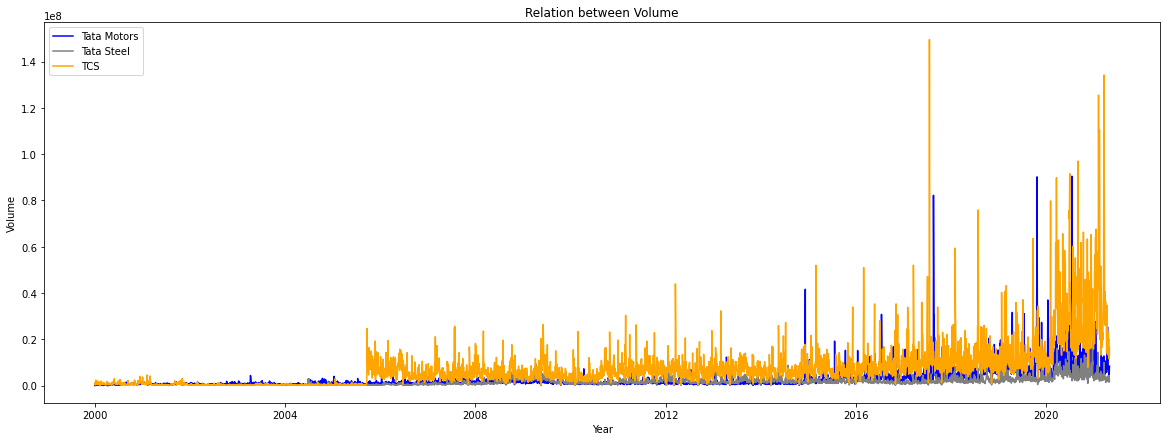

In [38]:
# Comparing Volumes

plt.figure(figsize=(20,7))

plt.plot(infy['Date'],infy['Volume'],color='blue',label='Tata Motors')

plt.plot(lt['Date'],lt['Volume'],color='grey',label='Tata Steel')

plt.plot(itc['Date'],itc['Volume'],color='orange',label='TCS')



plt.title("Relation between Volume")

plt.xlabel("Year")

plt.ylabel("Volume")

plt.legend(title="")

plt.show()

In [40]:
# Return on investmetns 
sumTM=0 #total amount invested in Infosys

s1=0 #number of shares owned by Infosys

#calcuating total amount invested and number of shares owned in Infosys

for i in range(len(infy)):

    if infy.loc[i,'Day']==30:

        sumTM+=infy.loc[i,'Open']

        s1+=1

#displaying results

print("Total Invested in Infosys = Rs",round(sumTM,2))

print("Shares Owned of Infosys =",s1)

print("Average Investmentment of 1 share = Rs",round((sumTM/s1),2))



tm_end=1346.30 #last open price of Infosys on 2021-04-30

#obtained by looking at the data or can be seen after executing infy.tail()

#calculating investment results

result1=round((tm_end*s1)-sumTM,2)

roiTM=round((result1/sumTM)*100,2)


#displaying investment results

print("nInvestment Result:")


if result1<0:

    print("Net Unrealised Loss = Rs",result1)

else:

    print("Net Unrealised Profit = Rs",result1)



print("Infosys ROI from 2000-1-3 to 2021-04-30 =",roiTM,"%")

Total Invested in Infosys = Rs 405060.5
Shares Owned of Infosys = 162
Average Investmentment of 1 share = Rs 2500.37
nInvestment Result:
Net Unrealised Loss = Rs -186959.9
Infosys ROI from 2000-1-3 to 2021-04-30 = -46.16 %


In [43]:
itc.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Month,Year,Day
5301,2021-04-26,ITC,EQ,205.35,205.8,206.75,204.70,205.50,205.3,205.64,19886214,4.089370e+14,4,2021,26
5302,2021-04-27,ITC,EQ,205.30,205.3,206.95,205.05,205.50,205.4,205.85,11444814,2.355887e+14,4,2021,27
5303,2021-04-28,ITC,EQ,205.40,206.0,206.50,205.30,205.65,205.5,205.96,12708021,2.617327e+14,4,2021,28
5304,2021-04-29,ITC,EQ,205.50,207.1,207.55,204.05,204.40,204.3,205.37,13096755,2.689642e+14,4,2021,29
5305,2021-04-30,ITC,EQ,204.30,203.9,205.70,202.00,202.40,202.6,203.73,16495657,3.360649e+14,4,2021,30


In [42]:
# Return on investmetns 
sumlt=0 #total amount invested in L&T

s2=0 #number of shares owned by L&T

#calcuating total amount invested and number of shares owned in L&T

for i in range(len(lt)):

    if lt.loc[i,'Day']==30:

        sumlt+=lt.loc[i,'Open']

        s2+=1

#displaying results

print("Total Invested in L&T = Rs",round(sumlt,2))

print("Shares Owned of L&T =",s2)

print("Average Investmentment of 1 share = Rs",round((sumlt/s2),2))



lt_end=1350 #last open price of L&T on 2021-04-30

#obtained by looking at the data or can be seen after executing lt.tail()

#calculating investment results

result2=round((lt_end*s2)-sumlt,2)

roilt=round((result2/sumlt)*100,2)


#displaying investment results

print("nInvestment Result:")


if result2<0:

    print("Net Unrealised Loss = Rs",result2)

else:

    print("Net Unrealised Profit = Rs",result2)



print("L&T ROI from 2000-1-3 to 2021-04-30 =",roilt,"%")

Total Invested in L&T = Rs 200237.9
Shares Owned of L&T = 130
Average Investmentment of 1 share = Rs 1540.29
nInvestment Result:
Net Unrealised Loss = Rs -24737.9
L&T ROI from 2000-1-3 to 2021-04-30 = -12.35 %


In [45]:
# Return on investmetns 
sumitc=0 #total amount invested in ITC

s3=0 #number of shares owned by ITC

#calcuating total amount invested and number of shares owned in ITC

for i in range(len(lt)):

    if itc.loc[i,'Day']==30:

        sumitc+=itc.loc[i,'Open']

        s3+=1

#displaying results

print("Total Invested in ITC = Rs",round(sumitc,2))

print("Shares Owned of ITC =",s3)

print("Average Investmentment of 1 share = Rs",round((sumitc/s3),2))



itc_end=203.9 #last open price of L&T on 2021-04-30

#obtained by looking at the data or can be seen after executing itc.tail()

#calculating investment results

result3=round((itc_end*s3)-sumitc,2)

roiitc=round((result3/sumitc)*100,2)


#displaying investment results

print("nInvestment Result:")


if result3<0:

    print("Net Unrealised Loss = Rs",result3)

else:

    print("Net Unrealised Profit = Rs",result3)



print("ITC ROI from 2000-1-3 to 2021-04-30 =",roiitc,"%")

Total Invested in ITC = Rs 58628.3
Shares Owned of ITC = 127
Average Investmentment of 1 share = Rs 461.64
nInvestment Result:
Net Unrealised Loss = Rs -32733.0
ITC ROI from 2000-1-3 to 2021-04-30 = -55.83 %


Text(0, 0.5, 'Percentage')

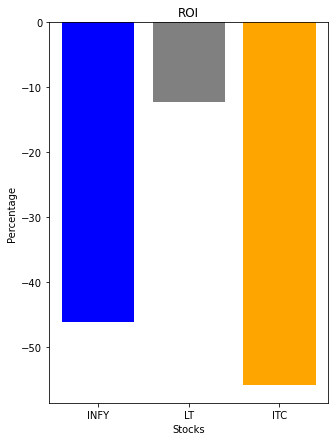

In [46]:
# ROI IN CHARTS

plt.figure(figsize=(5,7))

stock=['INFY','LT','ITC']

ROI=[roiTM,roilt,roiitc]

col=['Blue','Grey','Orange']




plt.bar(stock,ROI,color=col)




plt.title("ROI")

plt.xlabel("Stocks")

plt.ylabel("Percentage")

Text(0, 0.5, 'Amount')

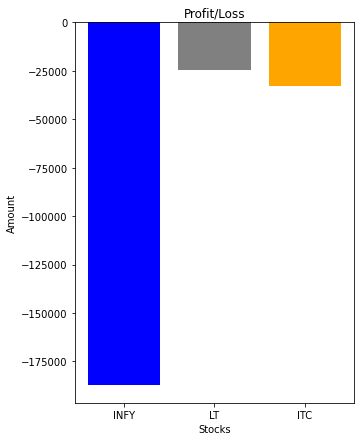

In [47]:

plt.figure(figsize=(5,7))

stock=['INFY','LT','ITC']

amt=[result1,result2,result3]

col=['Blue','Grey','Orange']




plt.bar(stock,amt,color=col)




plt.title("Profit/Loss")

plt.xlabel("Stocks")

plt.ylabel("Amount")


Text(0.5, 1.0, 'Sector Allocation')

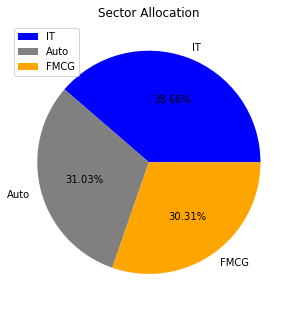

In [48]:
## Sector Allocation

plt.figure(figsize=(5,7))

sectors=['IT','Auto','FMCG']

shares=[s1,s2,s3]

col=['Blue','Grey','Orange']



plt.pie(shares,labels=sectors,autopct="%1.2f%%",colors=col)

plt.legend(title="",loc="upper left")

plt.title("Sector Allocation")